In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import mplcursors
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [4]:
weather_data = pd.read_csv('Weather_output.csv').reset_index()
weather_data

,index,ANNEE,MOIS,JOUR,DATE,T2M,T2M_MAX,T2M_MIN,T_SURFACE,LUM_SOL_ATTEINT_SURFACE,INDICE_CIEL_CLAIRE,INFRAROUGE_NUAGE,LUM_PHOTOSYNTHESE_NUAGE,LUM_PHOTOSYNTHESE_CLAIRE,INDICE_RAYONS_UVA,INDICE_RAYONS_UVB,VITESSE_VENT_10M,PRESSION,PRECIPITATION,HUMIDITE_2M
0,0,2001,1,1,2001-01-01,6.73,13.80,1.51,6.62,3.38,0.73,263.80,58.92,60.29,6.79,0.07,5.06,97.11,0.01,61.31
1,1,2001,1,2,2001-01-02,10.31,20.63,3.62,9.44,3.25,0.70,283.45,56.67,59.95,6.66,0.09,5.04,96.96,0.00,44.62
2,2,2001,1,3,2001-01-03,9.18,16.70,4.00,8.63,3.38,0.73,273.17,59.55,60.45,6.88,0.10,2.96,97.35,0.00,55.38
3,3,2001,1,4,2001-01-04,10.94,19.74,4.45,9.39,2.69,0.58,291.03,47.52,57.05,5.77,0.08,3.05,97.37,0.00,55.69
4,4,2001,1,5,2001-01-05,11.99,20.81,6.33,11.26,3.33,0.71,293.48,58.58,59.79,6.78,0.08,4.55,97.33,0.00,56.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,7665,2021,12,27,2021-12-27,12.87,18.92,7.89,12.51,1.74,0.38,319.41,31.56,56.70,4.19,0.05,3.62,96.74,0.01,70.81
7666,7666,2021,12,28,2021-12-28,13.15,20.98,8.91,12.76,2.60,0.57,305.27,46.73,56.80,5.62,0.07,4.82,96.96,0.00,64.25
7667,7667,2021,12,29,2021-12-29,13.21,21.85,8.82,12.97,2.91,0.64,295.43,52.79,58.20,6.26,0.08,6.03,97.13,0.00,70.00
7668,7668,2021,12,30,2021-12-30,13.26,21.47,9.05,12.90,2.99,0.66,300.41,54.95,58.56,6.45,0.08,6.10,97.27,0.00,64.31


# 1.Analyse Température d'été de 2001-->2021

# a-Analyse annuelle

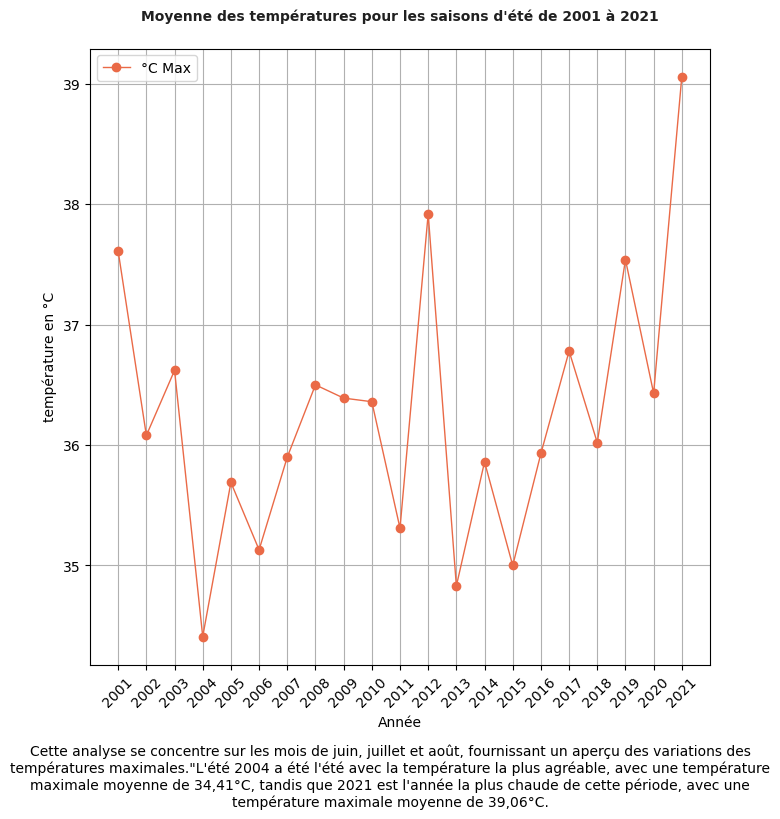

In [5]:
#Extraction des Mois d'été juin, juillet et août
Mois_été = weather_data[weather_data['MOIS'].isin([6,7,8])]
#Calcule les moyennes de températures pour chaque saison 
temp_moyenne_été = Mois_été.groupby('ANNEE')[['T2M_MAX']].mean().reset_index().round(2)
#plot
_ =plt.figure(figsize=(8,8))
_ =plt.plot(temp_moyenne_été['ANNEE'], temp_moyenne_été['T2M_MAX'], linewidth=1, marker='o', color='#EA6A47', label='°C Max');
_ =plt.xticks(temp_moyenne_été['ANNEE'], temp_moyenne_été['ANNEE'].astype(int), rotation= 45)
_=plt.grid(True)
_ =plt.title("Moyenne des températures pour les saisons d'été de 2001 à 2021",  fontsize=10, fontweight='bold', color='#202020', pad=20)
_ =plt.xlabel("Année")
_ =plt.ylabel("température en °C")
_ =plt.legend(loc='best')
plt.figtext(0.5, -0.03, 'Cette analyse se concentre sur les mois de juin, juillet et août, fournissant un aperçu des variations des températures maximales."L\'été 2004 a été l\'été avec la température la plus agréable, avec une température maximale moyenne de 34,41°C, tandis que 2021 est l\'année la plus chaude de cette période, avec une température maximale moyenne de 39,06°C.' , ha='center', va='center', fontsize=10, wrap=True)
plt.show()

# b-Analyse de tempratures pour les saisons d'été

In [6]:
#Calcule les moyennes de températures pour chaque mois d'été
temp_mensuelles = Mois_été.groupby(['MOIS','ANNEE'])[['T2M_MAX']].mean().reset_index().round(2)
temp_mensuelles

,MOIS,ANNEE,T2M_MAX
0,6,2001,35.67
1,6,2002,35.28
2,6,2003,33.57
3,6,2004,31.58
4,6,2005,32.68
...,...,...,...
58,8,2017,37.76
59,8,2018,33.77
60,8,2019,37.51
61,8,2020,38.88


In [8]:
temp_juin = temp_mensuelles.loc[temp_mensuelles['MOIS']==6,:]
temp_juillet = temp_mensuelles.loc[temp_mensuelles['MOIS']==7,:]
temp_aout = temp_mensuelles.loc[temp_mensuelles['MOIS']==8,:]

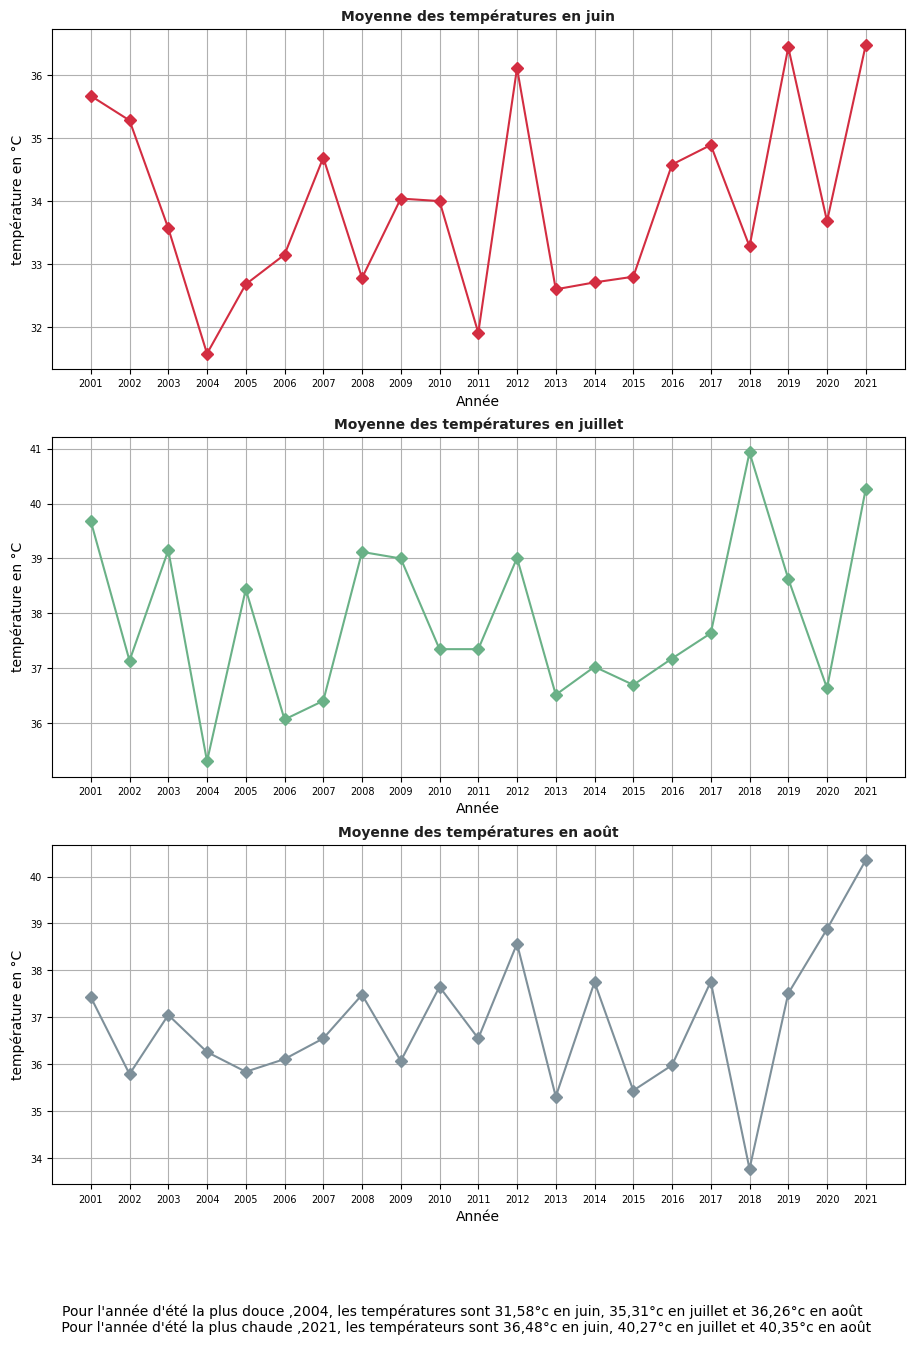

In [52]:
plt.figure(figsize=(11,15))
# plot mois  juin  
plt.subplot(3, 1, 1)
_ =plt.plot(temp_juin['ANNEE'], temp_juin['T2M_MAX'], linewidth=1.5, marker='D', color='#D32D41', label='°C Max');
_ =plt.xticks(temp_juin['ANNEE'], temp_juin['ANNEE'].astype(int), fontsize=7)
_ =plt.yticks(fontsize=7)
_ =plt.title("Moyenne des températures en juin",  fontsize=10, fontweight='bold', color='#202020')
_ =plt.xlabel("Année")
_ =plt.ylabel("température en °C")
_ =plt.grid(True)


#plot mois juillet
plt.subplot(3, 1, 2)
_ =plt.plot(temp_juillet['ANNEE'], temp_juillet['T2M_MAX'], linewidth=1.5, marker='D', color='#6AB187', label='°C Max');
_ =plt.xticks(temp_juillet['ANNEE'], temp_juillet['ANNEE'].astype(int), fontsize=7)
_ =plt.yticks(fontsize=7)
_ =plt.title("Moyenne des températures en juillet",  fontsize=10, fontweight='bold', color='#202020')
_ =plt.xlabel("Année")
_ =plt.ylabel("température en °C")
_ =plt.grid(True)

#plot mois août
plt.subplot(3, 1, 3)
_ =plt.plot(temp_aout['ANNEE'], temp_aout['T2M_MAX'], linewidth=1.5, marker='D', color='#7E909A', label='°C Max');
_ =plt.xticks(temp_aout['ANNEE'], temp_aout['ANNEE'].astype(int), fontsize=7)
_ =plt.title("Moyenne des températures en août",  fontsize=10, fontweight='bold', color='#202020')
_ =plt.xlabel("Année")
_ =plt.yticks(fontsize=7)
_ =plt.ylabel("température en °C")
_ =plt.grid(True)
_=plt.figtext(0.5, 0.02, 'Pour l\'année d\'été la plus douce ,2004, les températures sont 31,58°c en juin, 35,31°c en juillet et 36,26°c en août \n Pour l\'année d\'été la plus chaude ,2021, les températeurs sont 36,48°c en juin, 40,27°c en juillet et 40,35°c en août' , ha='center', va='center', fontsize=10)

# 2-Analyse de température pour les saisons d'hiver

In [7]:
#Extraction des Mois d'hiver décembre, janvier et février 
mois_hiver = weather_data[weather_data['MOIS'].isin([12,1,2])]
#Calcule des moyennes de température pour chaque mois
temp_mois = mois_hiver.groupby(['ANNEE','MOIS'])[['T2M_MAX']].mean().reset_index().round(2)
#Calcule des moyenne de température pour chaque hiver 
temp_mois= temp_mois.iloc[2:]
temp_mois= temp_mois.iloc[:-1]


In [8]:
#ajouter auxillère pour grouper les mois d'hiver 
length = len(temp_mois)
sequence = np.repeat(np.arange(1, length // 3 + 2), 3)[:length]
temp_mois['Aux'] = sequence
temp_hiver = temp_mois.groupby(['Aux'])[['T2M_MAX']].mean().reset_index().round(2)

In [9]:
temp_hiver

,Aux,T2M_MAX
0,1,16.53
1,2,15.10
2,3,15.95
3,4,14.00
4,5,13.81
5,6,17.01
6,7,16.04
7,8,14.97
8,9,17.57
9,10,15.99


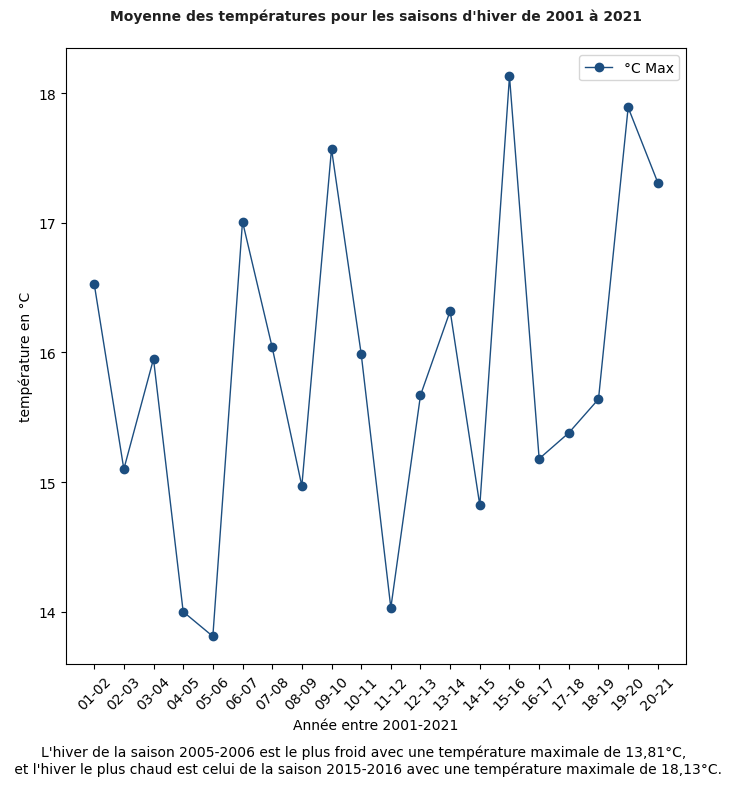

In [10]:
#Analyse des valeurs avec matplotlib
_ =plt.figure(figsize=(8,8))
x=temp_hiver['Aux']
y=temp_hiver['T2M_MAX']
ticks= ['01-02','02-03','03-04','04-05','05-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21']
_=plt.xticks(x, ticks, rotation= 45)
_=plt.title("Moyenne des températures pour les saisons d'hiver de 2001 à 2021", fontsize=10, fontweight='bold', color='#202020', pad=20)
_=plt.plot(x,y,linewidth=1, marker='o', color='#1C4E80', label='°C Max')
_=plt.xlabel("Année entre 2001-2021")
_=plt.ylabel("température en °C")
_=plt.legend(loc='best')
_=plt.figtext(0.5, -0.01, 'L\'hiver de la saison 2005-2006 est le plus froid avec une température maximale de 13,81°C, \n et l\'hiver le plus chaud est celui de la saison 2015-2016 avec une température maximale de 18,13°C.' , ha='center', va='center', fontsize=10)
_=plt.show

# 3-Analyse les indices UVA et UVB

# a-Analyse annuelle 

In [11]:
UV_annuelle = weather_data.groupby(['ANNEE'])[['INDICE_RAYONS_UVA','INDICE_RAYONS_UVB']].mean().reset_index().round(2)
UV_annuelle

,ANNEE,INDICE_RAYONS_UVA,INDICE_RAYONS_UVB
0,2001,11.96,0.25
1,2002,11.61,0.25
2,2003,11.68,0.24
3,2004,11.70,0.25
4,2005,11.63,0.25
5,2006,11.77,0.25
6,2007,11.76,0.25
7,2008,11.84,0.26
8,2009,11.88,0.25
9,2010,11.64,0.24


# UVA

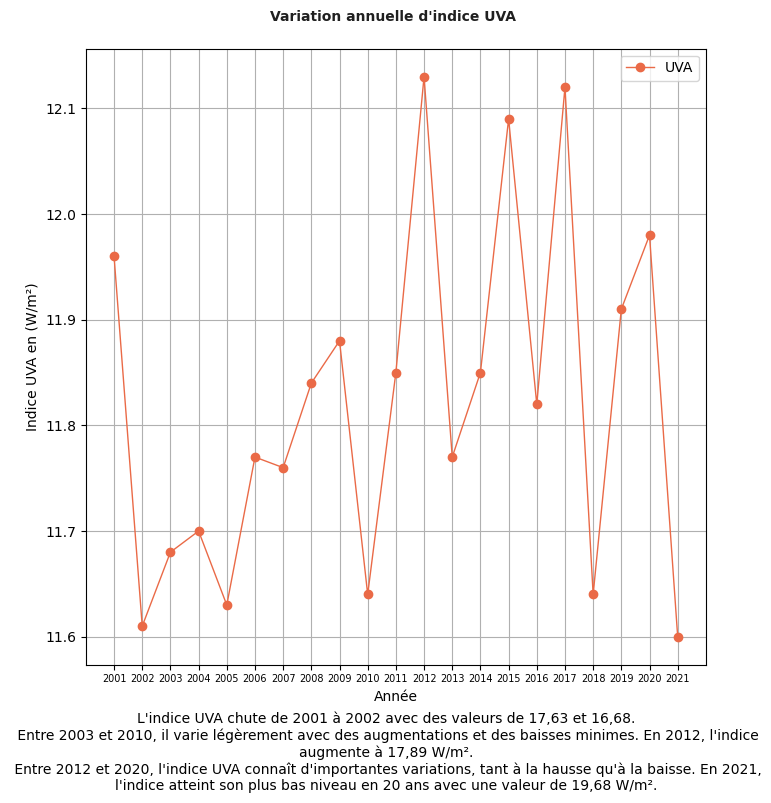

In [13]:
#plot
_ =plt.figure(figsize=(8,8))
_ =plt.plot(UV_annuelle['ANNEE'], UV_annuelle['INDICE_RAYONS_UVA'], linewidth=1, marker='o', color='#EA6A47', label='UVA');
_ =plt.xticks(UV_annuelle['ANNEE'], UV_annuelle['ANNEE'].astype(int), fontsize=7)
_ =plt.grid(True)
_ =plt.title("Variation annuelle d\'indice UVA ",  fontsize=10, fontweight='bold', color='#202020', pad=20)
_ =plt.xlabel("Année")
_ =plt.ylabel("Indice UVA en (W/m²)")
_ =plt.legend(loc='best')
plt.figtext(0.5, 0, 'L\'indice UVA chute de 2001 à 2002 avec des valeurs de 17,63 et 16,68.\n Entre 2003 et 2010, il varie légèrement avec des augmentations et des baisses minimes. En 2012, l\'indice augmente à 17,89 W/m².\n Entre 2012 et 2020, l\'indice UVA connaît d\'importantes variations, tant à la hausse qu\'à la baisse. En 2021, l\'indice atteint son plus bas niveau en 20 ans avec une valeur de 19,68 W/m².', ha='center', va='center', fontsize=10, wrap=True)
plt.show()

# UVB

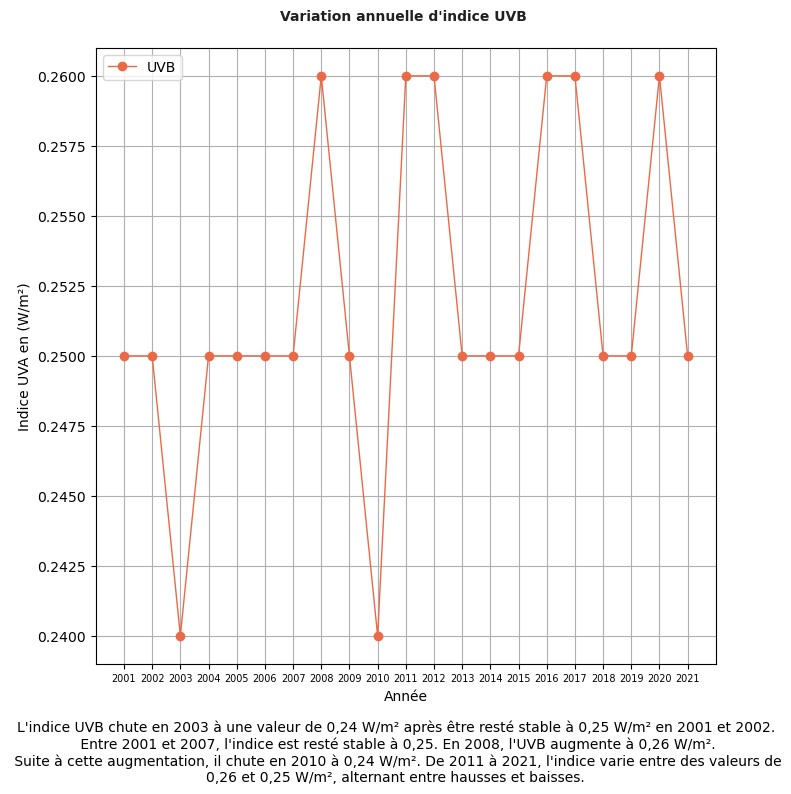

In [49]:
#plot
_ =plt.figure(figsize=(8,8))
_ =plt.plot(UV_annuelle['ANNEE'], UV_annuelle['INDICE_RAYONS_UVB'], linewidth=1, marker='o', color='#EA6A47', label='UVB');
_ =plt.xticks(UV_annuelle['ANNEE'], UV_annuelle['ANNEE'].astype(int), fontsize=7)
_ =plt.grid(True)
_ =plt.title("Variation annuelle d\'indice UVB ",  fontsize=10, fontweight='bold', color='#202020', pad=20)
_ =plt.xlabel("Année")
_ =plt.ylabel("Indice UVA en (W/m²)")
_ =plt.legend(loc='best')
plt.figtext(0.5, 0, 'L\'indice UVB chute en 2003 à une valeur de 0,24 W/m² après être resté stable à 0,25 W/m² en 2001 et 2002.\n Entre 2001 et 2007, l\'indice est resté stable à 0,25. En 2008, l\'UVB augmente à 0,26 W/m².\n Suite à cette augmentation, il chute en 2010 à 0,24 W/m². De 2011 à 2021, l\'indice varie entre des valeurs de 0,26 et 0,25 W/m², alternant entre hausses et baisses.' , ha='center', va='center', fontsize=10, wrap=True)
plt.show()

# b-Analyse mensuelles

# UVA

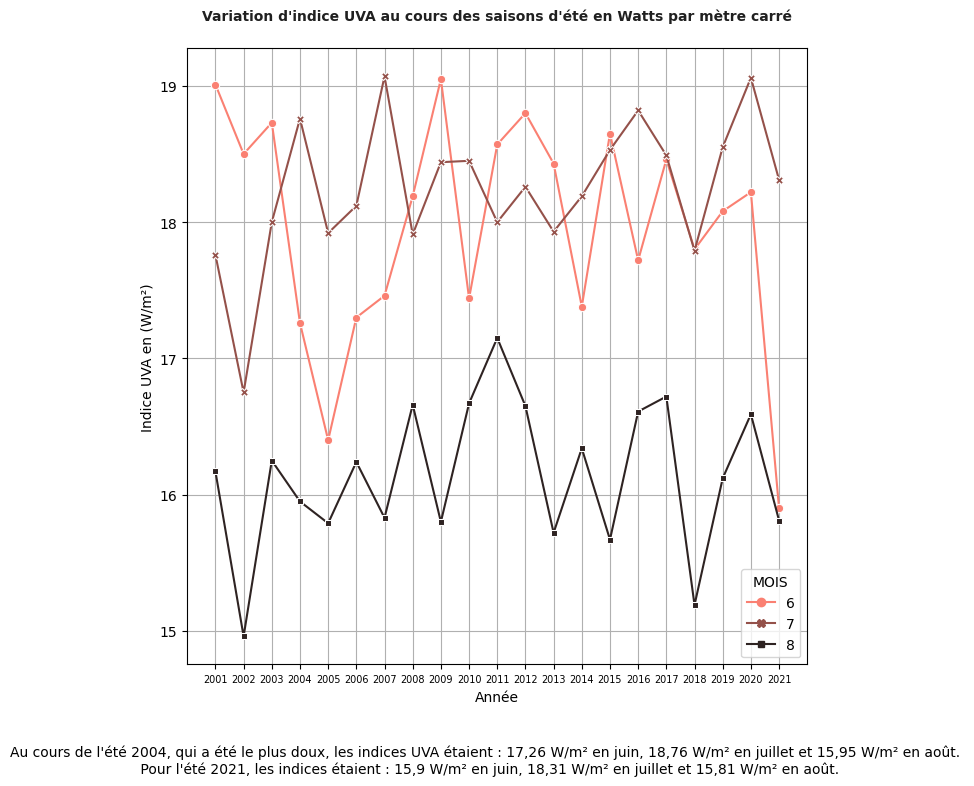

In [60]:
#Calcule UVA et UVB pendant les saisons d'été
UV_été =  weather_data[weather_data['MOIS'].isin([6,7,8])].groupby(['ANNEE','MOIS'])[['INDICE_RAYONS_UVA','INDICE_RAYONS_UVB']].mean().reset_index().round(2)

#lineplot
_=plt.figure(figsize=(8,8))
_=sns.lineplot(data=UV_été, x='ANNEE', y='INDICE_RAYONS_UVA', hue='MOIS', style='MOIS', markers=True, dashes=False, palette='dark:salmon_r')
_=plt.xticks(temp_moyenne_été['ANNEE'], temp_moyenne_été['ANNEE'].astype(int), fontsize=7)
_=plt.grid(True)
_=plt.xlabel('Année')
_=plt.ylabel('Indice UVA en (W/m²)')
_=plt.title('Variation d\'indice UVA au cours des saisons d\'été en Watts par mètre carré', fontsize=10, fontweight='bold', color='#202020', pad=20)
_=plt.figtext(0.5, -0.01,'Au cours de l\'été 2004, qui a été le plus doux, les indices UVA étaient : 17,26 W/m² en juin, 18,76 W/m² en juillet et 15,95 W/m² en août. \n Pour l\'été 2021, les indices étaient : 15,9 W/m² en juin, 18,31 W/m² en juillet et 15,81 W/m² en août.' , ha='center', va='center', fontsize=10)

In [67]:
# Calcule les moyennes d'indice UVA et UVB
UVA_été = Mois_été.groupby(['ANNEE','MOIS'])[['INDICE_RAYONS_UVA','INDICE_RAYONS_UVB']].mean().reset_index().round(2)
UVA_juin = UVA_été.loc[UVA_été['MOIS']==6,:]
UVA_juillet = UVA_été.loc[UVA_été['MOIS']==7,:]
UVA_aout = UVA_été.loc[UVA_été['MOIS']==8,:]
UVA_aout

,ANNEE,MOIS,INDICE_RAYONS_UVA,INDICE_RAYONS_UVB
2,2001,8,16.17,0.39
5,2002,8,14.96,0.36
8,2003,8,16.25,0.39
11,2004,8,15.95,0.39
14,2005,8,15.79,0.39
17,2006,8,16.24,0.40
20,2007,8,15.83,0.40
23,2008,8,16.66,0.42
26,2009,8,15.80,0.40
29,2010,8,16.67,0.41


### UVB

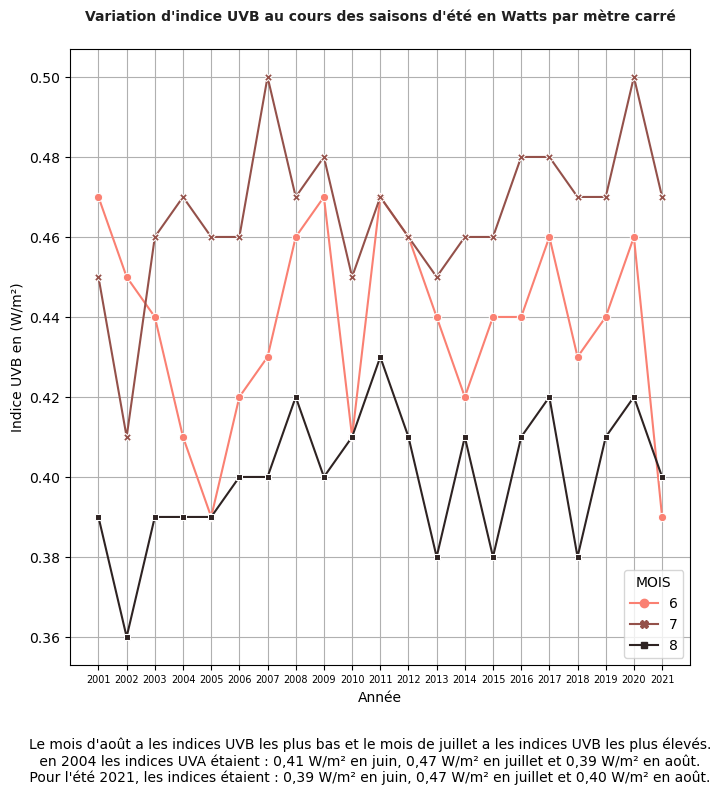

In [68]:
#lineplot
_=plt.figure(figsize=(8,8))
_=sns.lineplot(data=UV_été, x='ANNEE', y='INDICE_RAYONS_UVB', hue='MOIS', style='MOIS', markers=True, dashes=False, palette='dark:salmon_r')
_=plt.xticks(temp_moyenne_été['ANNEE'], temp_moyenne_été['ANNEE'].astype(int), fontsize=7)
_=plt.grid(True)
_=plt.xlabel('Année')
_=plt.ylabel('Indice UVB en (W/m²)')
_=plt.title('Variation d\'indice UVB au cours des saisons d\'été en Watts par mètre carré', fontsize=10, fontweight='bold', color='#202020', pad=20)
_=plt.legend(loc='lower right',title='MOIS')
_=plt.figtext(0.5, -0.01,'Le mois d\'août a les indices UVB les plus bas et le mois de juillet a les indices UVB les plus élevés.\n en 2004 les indices UVA étaient : 0,41 W/m² en juin, 0,47 W/m² en juillet et 0,39 W/m² en août. \n Pour l\'été 2021, les indices étaient : 0,39 W/m² en juin, 0,47 W/m² en juillet et 0,40 W/m² en août. ' , ha='center', va='center', fontsize=10)

# 4-matrice de corrélation

In [14]:
matrix_correlation = weather_data[['INDICE_RAYONS_UVA', 'INDICE_RAYONS_UVB', 'T2M_MAX', 'INDICE_CIEL_CLAIRE']].corr().round(2)
matrix_correlation

,INDICE_RAYONS_UVA,INDICE_RAYONS_UVB,T2M_MAX,INDICE_CIEL_CLAIRE
INDICE_RAYONS_UVA,1.00,0.98,0.79,0.61
INDICE_RAYONS_UVB,0.98,1.00,0.85,0.50
T2M_MAX,0.79,0.85,1.00,0.36
INDICE_CIEL_CLAIRE,0.61,0.50,0.36,1.00


Text(0.5, 1.0, 'Matrice de Corrélation')

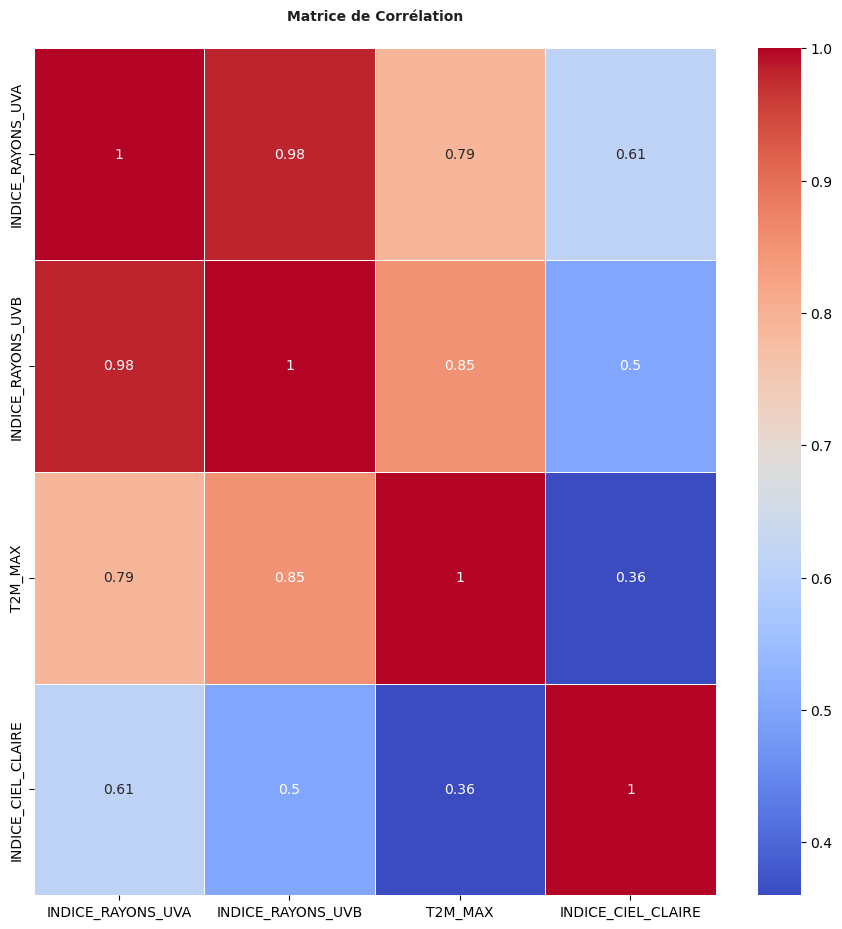

In [19]:
plt.figure(figsize=(11, 11))
sns.heatmap(matrix_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation',  fontsize=10, fontweight='bold', color='#202020', pad=20)

# 5-Analyse les vagues de chaleur

In [20]:
#le seuil pour les vagues de chaleur
seuil_chaleur = np.percentile(weather_data['T2M_MAX'], 95)

In [21]:
# les vagues de chaleur
weather_data['vague_de_chaleur'] = (weather_data['T2M_MAX'] > seuil_chaleur).astype(int)
weather_data['vague_de_chaleur'] = weather_data['vague_de_chaleur'].groupby((weather_data['vague_de_chaleur'] != weather_data['vague_de_chaleur'].shift()).cumsum()).transform('sum')
df_vagues = weather_data[weather_data['vague_de_chaleur'] >= 3]

In [22]:
df_vagues.reset_index()

,level_0,index,ANNEE,MOIS,JOUR,DATE,T2M,T2M_MAX,T2M_MIN,T_SURFACE,...,INFRAROUGE_NUAGE,LUM_PHOTOSYNTHESE_NUAGE,LUM_PHOTOSYNTHESE_CLAIRE,INDICE_RAYONS_UVA,INDICE_RAYONS_UVB,VITESSE_VENT_10M,PRESSION,PRECIPITATION,HUMIDITE_2M,vague_de_chaleur
0,185,185,2001,7,5,2001-07-05,30.64,41.60,20.70,32.69,...,402.95,132.09,139.84,16.47,0.41,2.85,96.45,0.0,37.44,3
1,186,186,2001,7,6,2001-07-06,33.02,43.22,22.99,34.49,...,406.21,138.48,141.95,17.32,0.44,3.54,96.69,0.0,29.69,3
2,187,187,2001,7,7,2001-07-07,32.52,40.85,25.96,33.75,...,404.84,137.14,140.31,17.04,0.43,3.70,96.82,0.0,29.25,3
3,189,189,2001,7,9,2001-07-09,30.72,40.91,22.05,32.83,...,391.98,143.42,144.34,18.00,0.45,4.42,96.85,0.0,33.75,3
4,190,190,2001,7,10,2001-07-10,31.73,41.62,21.83,33.01,...,413.03,108.55,137.09,13.33,0.34,4.28,96.72,0.0,33.38,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,7525,7525,2021,8,9,2021-08-09,33.63,44.36,24.17,36.24,...,402.28,136.66,137.56,17.22,0.44,2.89,97.03,0.0,42.00,8
261,7526,7526,2021,8,10,2021-08-10,35.45,44.37,28.04,36.50,...,397.12,135.60,137.38,17.05,0.44,3.05,97.13,0.0,20.94,8
262,7527,7527,2021,8,11,2021-08-11,37.14,45.51,29.23,38.08,...,408.60,129.47,135.36,16.36,0.43,3.31,97.04,0.0,15.69,8
263,7528,7528,2021,8,12,2021-08-12,35.88,44.50,28.39,37.19,...,415.19,122.83,126.70,15.16,0.39,3.09,97.07,0.0,19.12,8


In [23]:
# Analyser les tendances des vagues de chaleur
vagues_par_annee = df_vagues.groupby('ANNEE').size()
duree_vagues = df_vagues.groupby('ANNEE')['vague_de_chaleur'].mean()
intensite_vagues = df_vagues.groupby('ANNEE')['T2M_MAX'].mean()


In [24]:
vagues_par_annee

ANNEE
2001    13
2002    12
2003    20
2005     9
2006     7
2007    12
2008    14
2009    10
2010    11
2011     3
2012    27
2015     6
2016     9
2017    21
2018    15
2019    26
2020    14
2021    36
dtype: int64

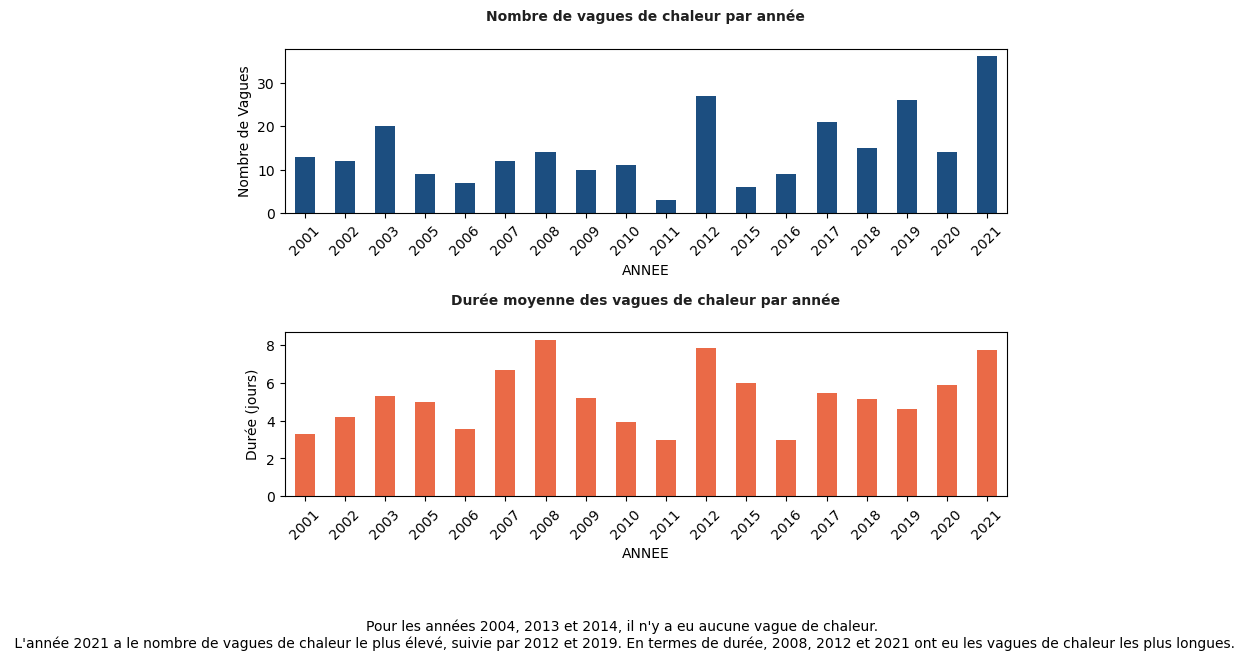

In [27]:
plt.figure(figsize=(8,8))
#Nombre vagues de chaleur par année
plt.subplot(3, 1, 1)
vagues_par_annee.plot(kind='bar', color='#1C4E80')
plt.title('Nombre de vagues de chaleur par année', fontsize=10, fontweight='bold', color='#202020', pad=20)
plt.ylabel('Nombre de Vagues')
plt.xticks(rotation= 45)
#durée des vagues de chaleur 
plt.subplot(3, 1, 2)
duree_vagues.plot(kind='bar', color="#EA6A47")
plt.title('Durée moyenne des vagues de chaleur par année', fontsize=10, fontweight='bold', color='#202020', pad=20)
plt.ylabel('Durée (jours)')
plt.xticks(rotation= 45)

plt.tight_layout()
plt.figtext(0.5, 0.2, 'Pour les années 2004, 2013 et 2014, il n\'y a eu aucune vague de chaleur.\n L\'année 2021 a le nombre de vagues de chaleur le plus élevé, suivie par 2012 et 2019. En termes de durée, 2008, 2012 et 2021 ont eu les vagues de chaleur les plus longues.'  , ha='center', va='center', fontsize=10)
plt.show()



# 6.Analyse des précipitations annuelles

In [28]:
precipitation_par_annee = (weather_data).groupby(['ANNEE'])[['PRECIPITATION']].sum().reset_index()
min_precipitations = precipitation_par_annee.nsmallest(6, 'PRECIPITATION')['PRECIPITATION'].values
colors = ['#EA6A47' if value in min_precipitations else '#7E909A' for value in precipitation_par_annee['PRECIPITATION']]

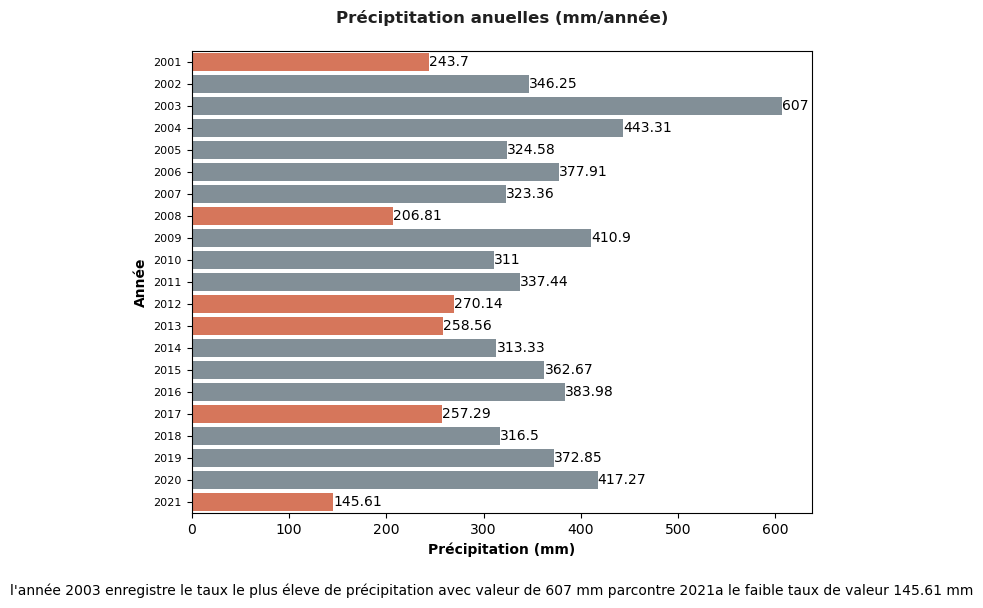

In [42]:
plt.subplots(figsize=(8,6))
ax=sns.barplot(precipitation_par_annee, x='PRECIPITATION', y='ANNEE',orient='h', errorbar=None, palette=colors)
ax.bar_label(ax.containers[0], fontsize=10)
ax=plt.title('Préciptitation anuelles (mm/année)',fontsize=12, fontweight='bold', color='#202020', pad=20)
plt.xlabel('Précipitation (mm)', fontsize=10, fontweight='bold')
plt.ylabel('Année', fontsize=10, fontweight='bold')
plt.yticks(fontsize= 8)
ax=plt.figtext(0.5, -0.02,'l\'année 2003 enregistre le taux le plus éleve de précipitation avec valeur de 607 mm parcontre 2021a le faible taux de valeur 145.61 mm', ha='center', va='center', fontsize=10)


# 7-Analyse de humidité mensuelles

In [37]:
humidités_mensuelles = weather_data.groupby(['ANNEE','MOIS'])['HUMIDITE_2M'].mean().unstack().round(2)
humidités_mensuelles

MOIS,1,2,3,4,5,6,7,8,9,10,11,12
ANNEE,,,,,,,,,,,,
2001,58.97,59.08,47.14,50.93,51.63,36.52,36.09,39.54,59.91,58.35,65.68,72.03
2002,64.67,59.61,52.77,50.42,48.04,36.39,40.75,49.18,54.54,53.14,63.74,69.50
2003,73.25,74.54,66.31,65.38,56.04,45.67,37.02,40.74,62.84,59.88,70.94,74.18
2004,73.07,64.88,69.66,62.87,58.86,51.00,43.79,47.26,56.70,51.66,72.56,75.33
2005,71.03,69.36,62.39,58.23,44.31,46.49,37.52,46.31,57.76,69.26,67.11,74.99
2006,75.69,67.67,56.24,53.26,51.48,42.59,42.08,45.47,55.94,55.47,66.13,74.90
2007,66.71,65.70,59.84,67.87,50.15,43.93,36.88,43.62,55.12,64.98,59.77,71.96
2008,68.10,65.02,54.31,48.24,51.56,43.71,35.85,41.32,50.83,65.66,65.21,67.87
2009,76.45,65.30,59.79,60.88,53.63,42.85,36.56,43.90,62.69,64.06,55.67,62.93


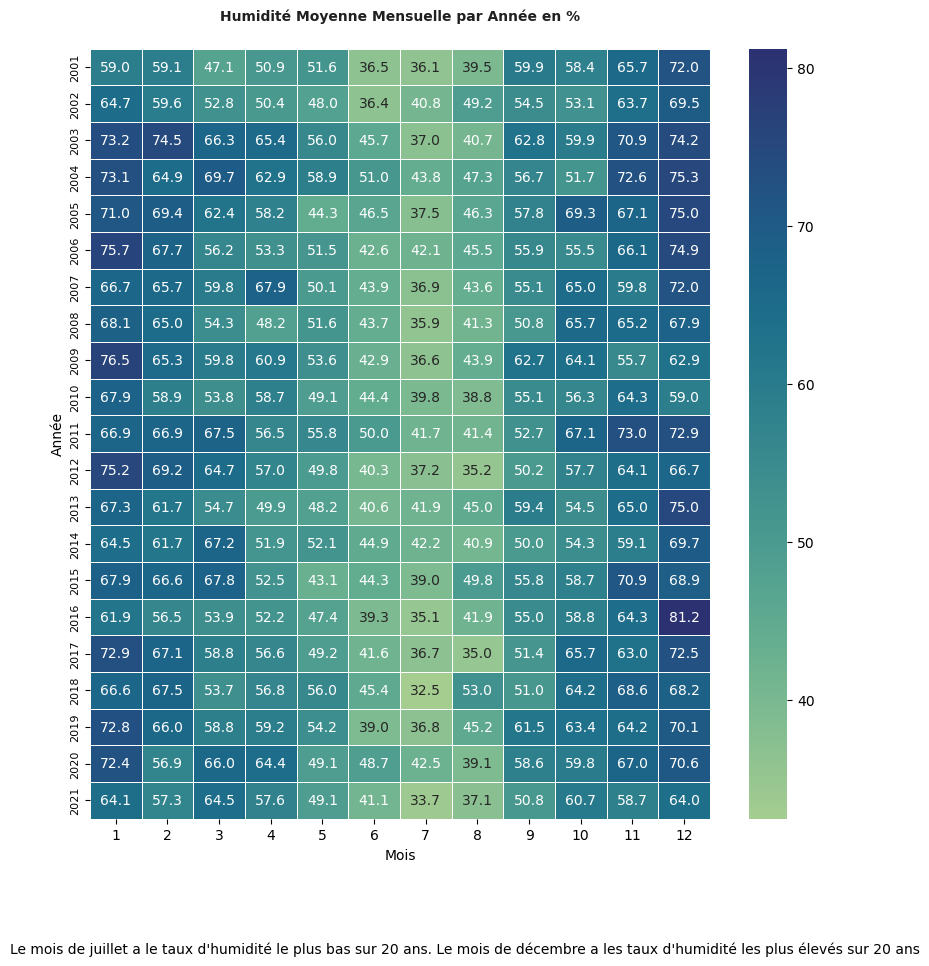

In [45]:
plt.subplots(figsize=(10,10))
sns.heatmap(humidités_mensuelles, cmap='crest', annot=True, linewidth=.5, fmt=".1f")
plt.title('Humidité Moyenne Mensuelle par Année en %', fontsize=10, fontweight='bold', color='#202020', pad=20)
plt.xlabel('Mois')
plt.ylabel('Année')
plt.yticks(fontsize= 8)
plt.figtext(0.5, -0.02,'Le mois de juillet a le taux d\'humidité le plus bas sur 20 ans. Le mois de décembre a les taux d\'humidité les plus élevés sur 20 ans', ha='center', va='center', fontsize=10)
plt.show()